In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report

In [2]:
df = pd.read_csv('pulsar_stars.csv')
df.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [3]:
df.shape

(17898, 9)

In [4]:
df.describe()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309331,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392140,110.642211,34.539844,1191.000837,1.000000


In [5]:
#Need to make sure there aren't any missing values

df.isnull().sum()

 Mean of the integrated profile                  0
 Standard deviation of the integrated profile    0
 Excess kurtosis of the integrated profile       0
 Skewness of the integrated profile              0
 Mean of the DM-SNR curve                        0
 Standard deviation of the DM-SNR curve          0
 Excess kurtosis of the DM-SNR curve             0
 Skewness of the DM-SNR curve                    0
target_class                                     0
dtype: int64

In [6]:
#I want to shorten the column names
cols = ['mean_profile', 'std_profile', 'Excess_kurtosis_profile', 'skew_profile', 'mean_dmsnr', 'std_dmsnr', 'excess_kurtosis_dmsnr', 'skew_dmsnr', 'target_class']
print(len(cols))

9


In [7]:
data = np.array(df)
df = pd.DataFrame(data, columns = cols)
df.head()

,mean_profile,std_profile,Excess_kurtosis_profile,skew_profile,mean_dmsnr,std_dmsnr,excess_kurtosis_dmsnr,skew_dmsnr,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0.0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0.0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0.0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0.0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0.0


In [8]:
df.shape

(17898, 9)

Text(0.5,1,'Pulsar (1) vs Non-Pulsar (0) Count')

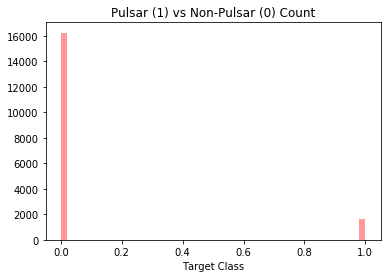

In [9]:
#Let's get an idea of how many pulsars and non-pulsars we have using a histogram

targets = np.array(df["target_class"])
sns.distplot(targets, kde = False, color = "r", axlabel = "Target Class").set_title("Pulsar (1) vs Non-Pulsar (0) Count")


In [10]:
#Non-Pulsars are way overrepresented, which is to be expected. Hopefully this doesn't lead to accuracy problems.

#Let's plot the other 8 feature distributions, separated by target class

star_data = []
notstar_data =[]

for i in range(df["target_class"].count()):
    if df["target_class"][i] == 1:
        star_data.append(df.loc[i])
    else:
        notstar_data.append(df.loc[i])
    

In [11]:
len(star_data) + len(notstar_data)

17898

In [12]:
dfstar = pd.DataFrame(star_data, columns = cols )
dfnotstar = pd.DataFrame(notstar_data, columns = cols)


In [13]:
dfstar.head()

,mean_profile,std_profile,Excess_kurtosis_profile,skew_profile,mean_dmsnr,std_dmsnr,excess_kurtosis_dmsnr,skew_dmsnr,target_class
19,99.367188,41.572202,1.547197,4.154106,27.555184,61.719016,2.208808,3.662680,1.0
42,120.554688,45.549905,0.282924,0.419909,1.358696,13.079034,13.312141,212.597029,1.0
61,27.765625,28.666042,5.770087,37.419009,73.112876,62.070220,1.268206,1.082920,1.0
92,23.625000,29.948654,5.688038,35.987172,146.568562,82.394624,-0.274902,-1.121848,1.0
93,94.585938,35.779823,1.187309,3.687469,6.071070,29.760400,5.318767,28.698048,1.0


In [14]:
dfstar = dfstar.reset_index(drop = True)
dfnotstar = dfnotstar.reset_index(drop = True)

In [15]:
dfstar.head()

,mean_profile,std_profile,Excess_kurtosis_profile,skew_profile,mean_dmsnr,std_dmsnr,excess_kurtosis_dmsnr,skew_dmsnr,target_class
0,99.367188,41.572202,1.547197,4.154106,27.555184,61.719016,2.208808,3.662680,1.0
1,120.554688,45.549905,0.282924,0.419909,1.358696,13.079034,13.312141,212.597029,1.0
2,27.765625,28.666042,5.770087,37.419009,73.112876,62.070220,1.268206,1.082920,1.0
3,23.625000,29.948654,5.688038,35.987172,146.568562,82.394624,-0.274902,-1.121848,1.0
4,94.585938,35.779823,1.187309,3.687469,6.071070,29.760400,5.318767,28.698048,1.0


In [16]:
dfnotstar.head()

,mean_profile,std_profile,Excess_kurtosis_profile,skew_profile,mean_dmsnr,std_dmsnr,excess_kurtosis_dmsnr,skew_dmsnr,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0.0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0.0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0.0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0.0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0.0


In [17]:
dfnotstar.describe()

,mean_profile,std_profile,Excess_kurtosis_profile,skew_profile,mean_dmsnr,std_dmsnr,excess_kurtosis_dmsnr,skew_dmsnr,target_class
count,16259.000000,16259.000000,16259.000000,16259.000000,16259.000000,16259.000000,16259.000000,16259.000000,16259.0
mean,116.562726,47.339741,0.210440,0.380844,8.863258,23.287984,8.862674,113.620344,0.0
std,17.475932,6.182929,0.334606,1.027791,24.411409,16.651426,4.238626,106.721930,0.0
min,17.210938,28.698714,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.0
25%,105.253906,43.384645,0.008650,-0.221980,1.857023,14.138541,6.615374,47.580165,0.0
50%,117.257812,47.485647,0.186665,0.124107,2.635452,17.618420,8.760010,90.674592,0.0
75%,128.285156,51.315620,0.392892,0.663383,4.227007,24.517386,10.935207,145.827223,0.0
max,192.617188,98.778911,4.785786,24.872429,223.392140,110.642211,34.539844,1191.000837,0.0


In [18]:
dfstar.describe()

,mean_profile,std_profile,Excess_kurtosis_profile,skew_profile,mean_dmsnr,std_dmsnr,excess_kurtosis_dmsnr,skew_dmsnr,target_class
count,1639.000000,1639.000000,1639.000000,1639.000000,1639.000000,1639.000000,1639.000000,1639.000000,1639.0
mean,56.690608,38.710598,3.130655,15.553576,49.825995,56.468963,2.757069,17.931728,1.0
std,30.007707,8.033614,1.872861,13.997200,45.287932,19.731080,3.105945,50.896263,0.0
min,5.812500,24.772042,-0.094888,-1.139069,0.486622,7.658623,-1.862320,-1.874683,1.0
25%,31.777344,32.284803,1.556038,3.805492,12.759615,43.333643,0.756451,-0.228294,1.0
50%,54.296875,37.341297,2.961258,11.609644,33.494983,59.367088,1.918327,2.585145,1.0
75%,79.277344,43.759278,4.586930,24.881853,78.313545,70.985965,3.709978,13.469687,1.0
max,139.257812,83.796909,8.069522,68.101622,199.577759,109.655345,30.883882,1017.383180,1.0


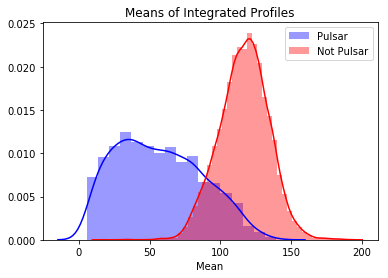

In [19]:
#mean profile distributions

mean_star_profile = np.array(dfstar["mean_profile"])
mean_notstar_profile = np.array(dfnotstar["mean_profile"])
sns.distplot(mean_star_profile, color = "b", label = "Pulsar", axlabel = "Mean").set_title("Means of Integrated Profiles")
sns.distplot(mean_notstar_profile, color = "r", label = "Not Pulsar")
plt.legend()


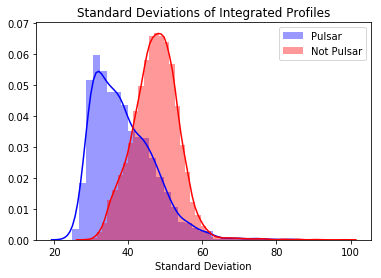

In [20]:
#std profile distributions

std_star_profile = np.array(dfstar["std_profile"])
std_notstar_profile = np.array(dfnotstar["std_profile"])
sns.distplot(std_star_profile, color = "b", label = "Pulsar", axlabel = "Standard Deviation").set_title("Standard Deviations of Integrated Profiles")
sns.distplot(std_notstar_profile, color = "r", label = "Not Pulsar")
plt.legend()

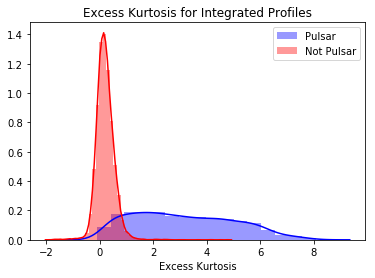

In [21]:
#Excess Kurtosis distributions

exkurt_star_profile = np.array(dfstar["Excess_kurtosis_profile"])
exkurt_notstar_profile = np.array(dfnotstar["Excess_kurtosis_profile"])
sns.distplot(exkurt_star_profile, color = "b", axlabel = "Excess Kurtosis", label = "Pulsar").set_title("Excess Kurtosis for Integrated Profiles")
sns.distplot(exkurt_notstar_profile, color = "r", label = "Not Pulsar")
plt.legend()

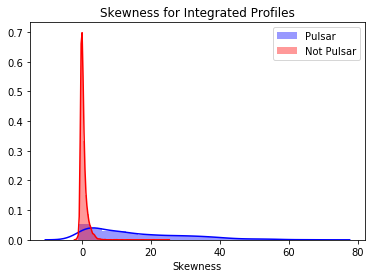

In [22]:
#Skewness Distributions

skew_star_profile = np.array(dfstar["skew_profile"])
skew_notstar_profile = np.array(dfnotstar["skew_profile"])
sns.distplot(skew_star_profile, color = "b", axlabel = "Skewness", label = "Pulsar").set_title("Skewness for Integrated Profiles")
sns.distplot(skew_notstar_profile, color = "r", label = "Not Pulsar")
plt.legend()

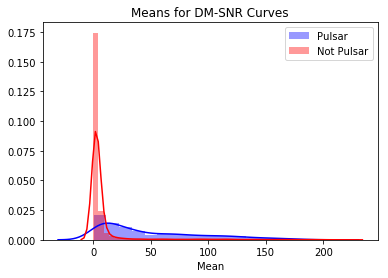

In [23]:
#Mean DM-SNR distributions

mean_star_dmsnr = np.array(dfstar["mean_dmsnr"])
mean_notstar_dmsnr = np.array(dfnotstar["mean_dmsnr"])
sns.distplot(mean_star_dmsnr, color = "b", axlabel = "Mean", label = "Pulsar").set_title("Means for DM-SNR Curves")
sns.distplot(mean_notstar_dmsnr, color = "r", label = "Not Pulsar")
plt.legend()

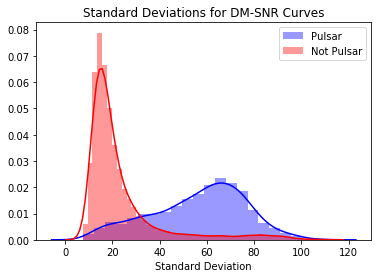

In [24]:
#Standard deviation DM-SNR distributions

std_star_dmsnr = np.array(dfstar["std_dmsnr"])
std_notstar_dmsnr = np.array(dfnotstar["std_dmsnr"])
sns.distplot(std_star_dmsnr, color = "b", axlabel = "Standard Deviation", label = "Pulsar").set_title("Standard Deviations for DM-SNR Curves")
sns.distplot(std_notstar_dmsnr, color = "r", label = "Not Pulsar")
plt.legend()

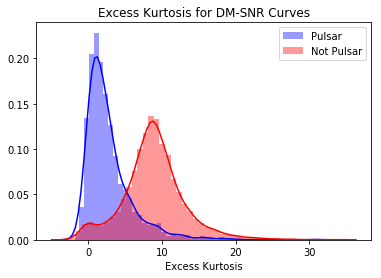

In [25]:
#Excess Kurtosis DM-SNR distributions

exkurt_star_dmsnr = np.array(dfstar["excess_kurtosis_dmsnr"])
exkurt_notstar_dmsnr = np.array(dfnotstar["excess_kurtosis_dmsnr"])
sns.distplot(exkurt_star_dmsnr, color = "b", axlabel = "Excess Kurtosis", label = "Pulsar").set_title("Excess Kurtosis for DM-SNR Curves")
sns.distplot(exkurt_notstar_dmsnr, color = "r", label = "Not Pulsar")
plt.legend()

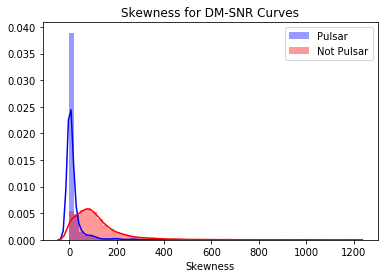

In [26]:
#Skewness DM-SNR distributions

skew_star_dmsnr = np.array(dfstar["skew_dmsnr"])
skew_notstar_dmsnr = np.array(dfnotstar["skew_dmsnr"])
sns.distplot(skew_star_dmsnr, color = "b", axlabel = "Skewness", label = "Pulsar").set_title("Skewness for DM-SNR Curves")
sns.distplot(skew_notstar_dmsnr, color = "r", label = "Not Pulsar")
plt.legend()

In [27]:
df.head()

,mean_profile,std_profile,Excess_kurtosis_profile,skew_profile,mean_dmsnr,std_dmsnr,excess_kurtosis_dmsnr,skew_dmsnr,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0.0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0.0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0.0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0.0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0.0


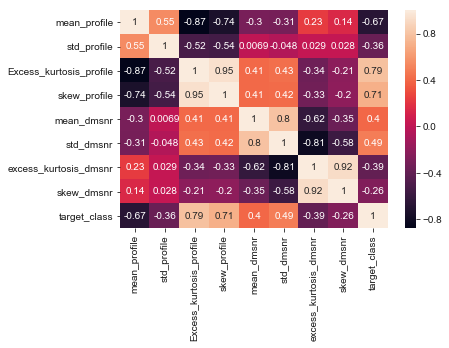

In [28]:
#Heatmap 


sns.heatmap(df[["mean_profile", "std_profile", "Excess_kurtosis_profile", "skew_profile", "mean_dmsnr", "std_dmsnr", "excess_kurtosis_dmsnr", "skew_dmsnr", "target_class"]].corr(), annot = True)
sns.set(style = "dark")


In [29]:
#By the look of the distributions for each feature, the pulsar and non-pulsars have a somewhat small overlap. We may be able to use a linear SVM to make accurate predictions.

from sklearn import svm
from sklearn.model_selection import train_test_split


In [30]:
X = np.array(df.drop("target_class", axis = 1))
y = np.array(df["target_class"])

In [58]:
X_train, X_test, y_train, y_true = train_test_split(X, y, test_size = 0.3)

In [59]:
clf = svm.SVC(kernel = 'linear')

In [60]:
clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [61]:
y_pred = clf.predict(X_test)

In [62]:
print(accuracy_score(y_true, y_pred))

0.9808193668528864


In [63]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      4852
         1.0       0.95      0.85      0.89       518

   micro avg       0.98      0.98      0.98      5370
   macro avg       0.97      0.92      0.94      5370
weighted avg       0.98      0.98      0.98      5370



In [43]:
#Let's try the decision tree classifier

from sklearn.tree import DecisionTreeClassifier
dct = DecisionTreeClassifier()

In [44]:
dct.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [45]:
y_pred1 = dct.predict(X_test)

In [46]:
accuracy_score(y_true, y_pred1)

0.9696089385474861

In [47]:
print(classification_report(y_true, y_pred1))

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      4046
         1.0       0.84      0.85      0.84       429

   micro avg       0.97      0.97      0.97      4475
   macro avg       0.91      0.91      0.91      4475
weighted avg       0.97      0.97      0.97      4475



In [64]:
#svc using the linear kernel had the best outcome for overall accuracy, precision, and recall.